In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

#Part 1: Data Loading and Basic Exploration
#load data
df = pd.read_csv("metadata.csv")
#Examine the first few rows and data structure
print(df.head())

/tmp/ipython-input-1867324536.py:8: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

In [8]:
#Check the DataFrame dimensions (rows, columns)
df_shape = df.shape
print(f"The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns.")

The DataFrame has 1056660 rows and 19 columns.


In [9]:
#Identify data types of each column
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [11]:
#Check for missing values in important columns
print(df[["title", "abstract", "doi"]].isnull().sum())

title          503
abstract    235544
doi         399880
dtype: int64


In [124]:
#Generate basic statistics for numerical columns
print(df.describe())

                        publish_time  mag_id         s2_id   publish_year
count                         519118     0.0  9.771250e+05  519118.000000
mean   2020-06-11 20:13:12.679891200     NaN  2.174688e+08    2019.962533
min              1856-04-01 00:00:00     NaN  9.600000e+01    1856.000000
25%              2020-08-06 00:00:00     NaN  2.211392e+08    2020.000000
50%              2021-03-17 00:00:00     NaN  2.320806e+08    2021.000000
75%              2021-10-20 00:00:00     NaN  2.373930e+08    2021.000000
max              2024-04-20 00:00:00     NaN  2.491936e+08    2024.000000
std                              NaN     NaN  5.330026e+07       3.536644


In [14]:
#Part 2: Data Cleaning and Preparation
#handle missing data
#Identify columns with many missing values
missing_cols = df.columns[df.isnull().mean() > 0.5]
print(missing_cols)

Index(['sha', 'pmcid', 'pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id',
       'pdf_json_files', 'pmc_json_files'],
      dtype='object')


In [101]:
#remove missing values
df_cleaned = df.drop(columns=missing_cols)
#cleaned version of the dataset
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   cord_uid      1056660 non-null  object        
 1   source_x      1056660 non-null  object        
 2   title         1056660 non-null  object        
 3   doi           1056660 non-null  object        
 4   license       1056660 non-null  object        
 5   abstract      1056660 non-null  object        
 6   publish_time  519118 non-null   datetime64[ns]
 7   authors       1056660 non-null  object        
 8   journal       1056660 non-null  object        
 9   url           1056660 non-null  object        
 10  s2_id         977125 non-null   float64       
 11  publish_year  519118 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 96.7+ MB
None


In [102]:
#Converting date columns to datetime format
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

#Extracting year from publication date for time-based analysis
df_cleaned['publish_year'] = df_cleaned['publish_time'].dt.year


In [126]:
print(df_cleaned['publish_year'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1056660 entries, 0 to 1056659
Series name: publish_year
Non-Null Count   Dtype  
--------------   -----  
519118 non-null  float64
dtypes: float64(1)
memory usage: 8.1 MB
None


In [104]:
#Part 3: Data Analysis and Visualization
#Counting papers by publication year
papers_per_year = df_cleaned['publish_year'].value_counts().sort_index()

print(papers_per_year)


publish_year
1856.0         3
1857.0         1
1860.0         2
1864.0         1
1876.0         1
           ...  
2020.0    164787
2021.0    219642
2022.0     85395
2023.0         1
2024.0         1
Name: count, Length: 75, dtype: int64


In [105]:
#Identifying top journals publishing COVID-19 research
top_journals = df_cleaned['journal'].value_counts().head(10)
print(top_journals)


journal
bioRxiv                            10642
PLoS One                           10579
Int J Environ Res Public Health     8505
BMJ                                 7385
Sci Rep                             6316
Cureus                              4465
Sustainability                      4005
Reactions Weekly                    3936
Front Psychol                       3756
BMJ Open                            3739
Name: count, dtype: int64


In [86]:
#Finding most frequent words in titles
all_titles = " ".join(df['title'].astype(str).tolist())#combine all titles into one string
words = all_titles.lower().split()#split into words
#remove most common stopwords
stopwords = {"and","of","in","the","to","for","on","with","a","an","by","at"}
words = [w.strip(".,:;!?()[]") for w in words if w not in stopwords]

from collections import Counter

word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print(most_common_words)




[('covid-19', 441003), ('pandemic', 135833), ('during', 115644), ('patients', 94840), ('sars-cov-2', 86659), ('study', 74740), ('from', 73972), ('health', 63757), ('coronavirus', 54767), ('disease', 53628)]


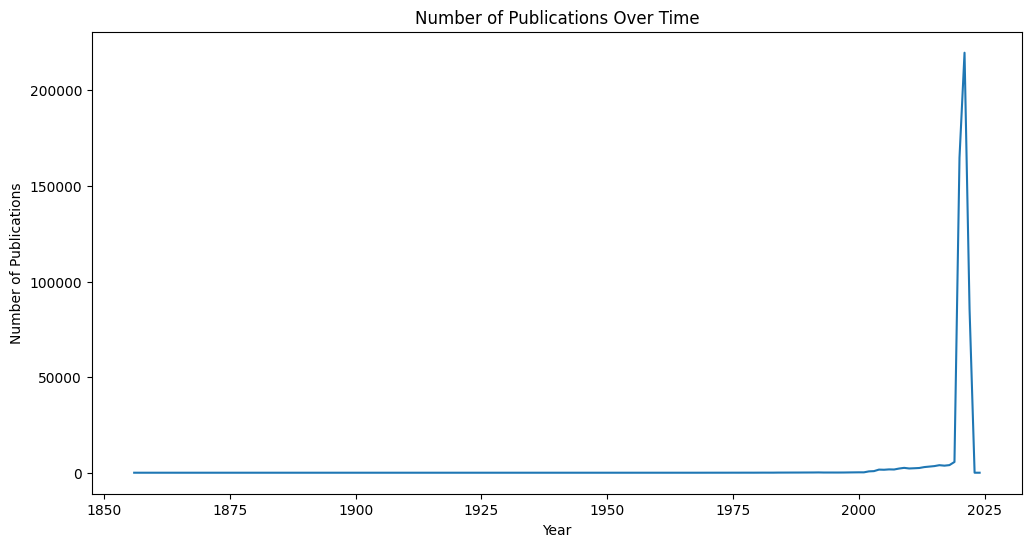

In [106]:
#line plot of number of publications over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values)
plt.title('Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()


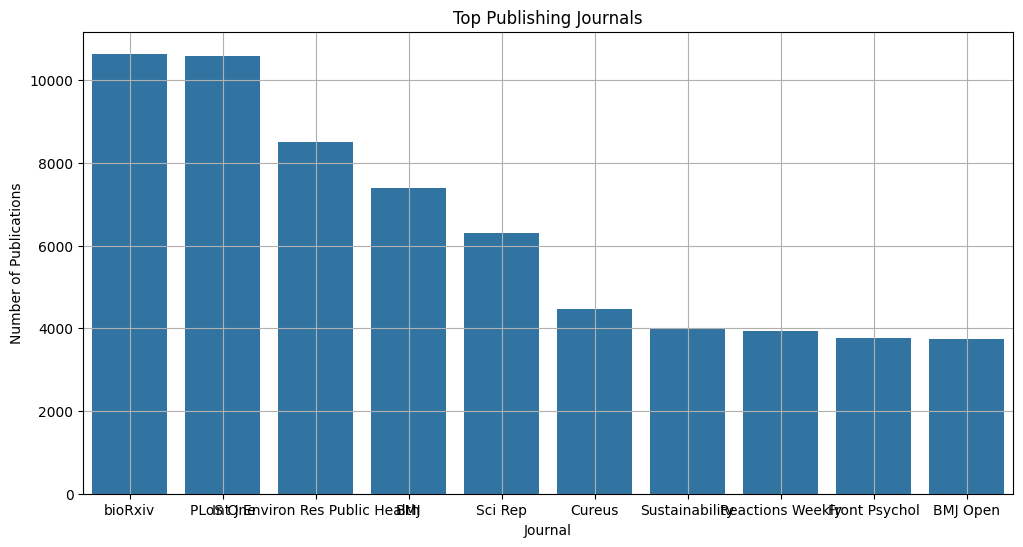

In [107]:
#Create a bar chart of top publishing journal
plt.figure(figsize=(12, 6))
sns.barplot(x=top_journals.index, y=top_journals.values)
plt.title('Top Publishing Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.grid(True)

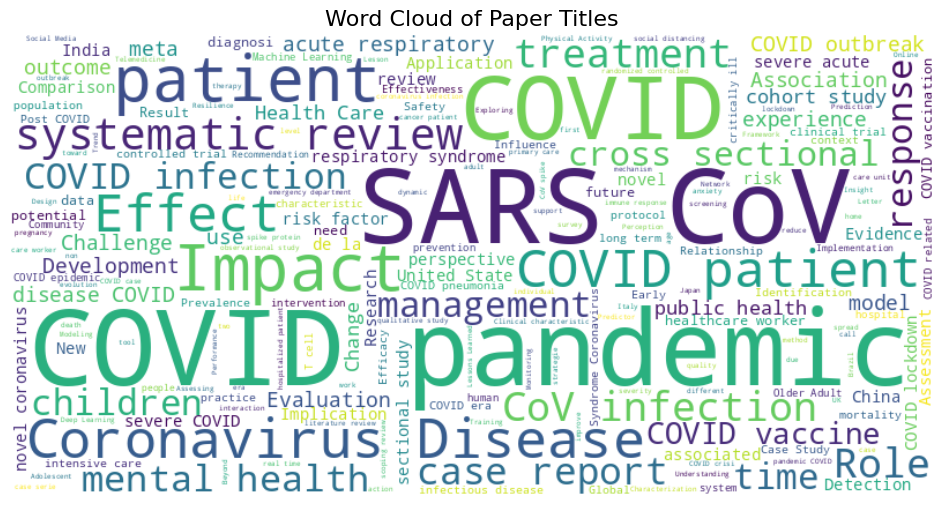

In [108]:
from wordcloud import WordCloud, STOPWORDS
# Combine all titles into one big string
text = " ".join(df['title'].astype(str).tolist())
#Define Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["using", "based", "approach", "analysis"])  # add custom words if needed
#geneate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color="white",
                      stopwords=stopwords,
                      colormap="viridis").generate(text)

#display word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles", fontsize=16)
plt.show()


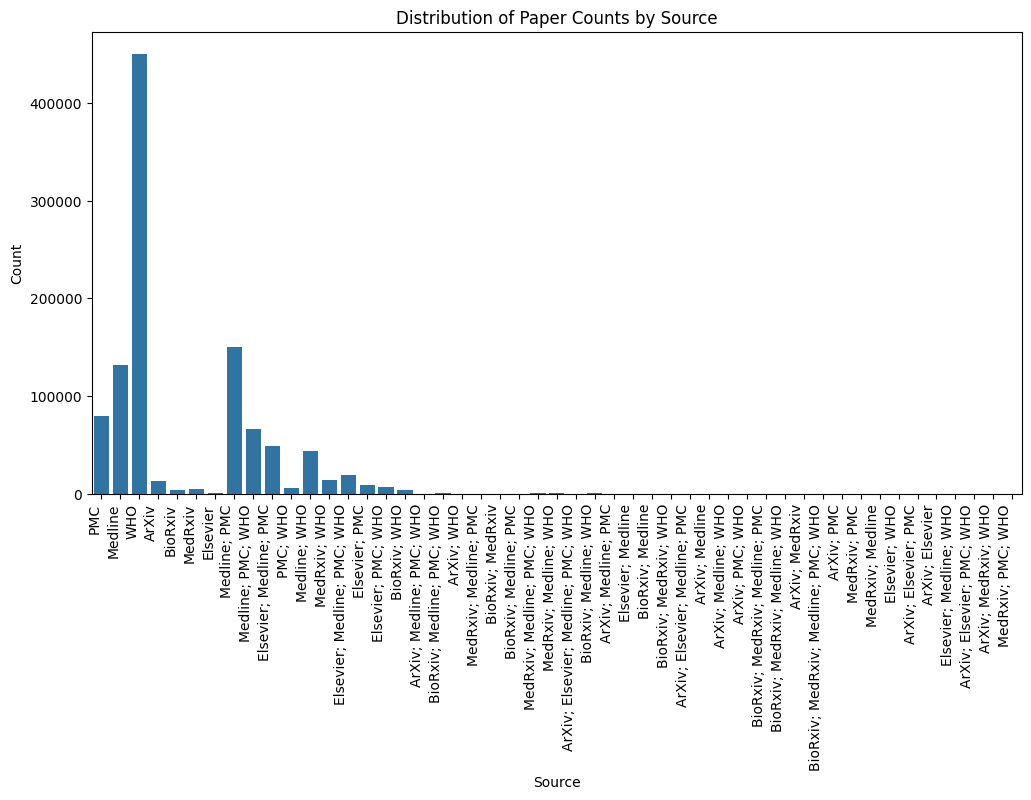

In [119]:
#Plot distribution of paper counts by source
plt.figure(figsize=(12, 6))
sns.countplot(x='source_x', data=df_cleaned)
plt.title('Distribution of Paper Counts by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [122]:

#Part 4: Streamlit Application
#Create a basic layout with title and description
%%writefile app.py

from wordcloud import WordCloud, STOPWORDS

st.title("COVID-19 Research Analysis")
st.write("This app analyzes a dataset of COVID-19 research papers to provide insights into publication trends, top journals, and frequent keywords.")

# Add interactive elements
year_range = st.slider("Select year range", 2019, 2022, (2020, 2021))

# Filter dataframe based on year range
filtered_df = df_cleaned[(df_cleaned['publish_year'] >= year_range[0]) & (df_cleaned['publish_year'] <= year_range[1])]

# Show filtered data preview
st.dataframe(filtered_df.head())

# Part 3: Data Analysis and Visualization (adapted for Streamlit)

st.header("Publication Trends Over Time")
# Counting papers by publication year
papers_per_year = filtered_df['publish_year'].value_counts().sort_index()
if not papers_per_year.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=papers_per_year.index, y=papers_per_year.values, ax=ax)
    ax.set_title('Number of Publications Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    st.pyplot(fig)
else:
    st.write("No data available for the selected year range.")


st.header("Top Publishing Journals")
# Identifying top journals publishing COVID-19 research
top_journals = filtered_df['journal'].value_counts().head(10)
if not top_journals.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=top_journals.index, y=top_journals.values, ax=ax)
    ax.set_title('Top Publishing Journals')
    ax.set_xlabel('Journal')
    ax.set_ylabel('Number of Publications')
    plt.xticks(rotation=90, ha='right')
    st.pyplot(fig)
else:
    st.write("No data available for the selected year range.")

st.header("Most Frequent Words in Titles")
# Finding most frequent words in titles
all_titles = " ".join(filtered_df['title'].astype(str).tolist())#combine all titles into one string
if all_titles:
    #Define Stopwords
    stopwords = set(STOPWORDS)
    stopwords.update(["using", "based", "approach", "analysis"])  # add custom words if needed
    #generate word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color="white",
                          stopwords=stopwords,
                          colormap="viridis").generate(all_titles)

    #display word cloud
    fig, ax = plt.subplots(figsize=(12,6))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title("Word Cloud of Paper Titles", fontsize=16)
    st.pyplot(fig)
else:
    st.write("No titles available for the selected year range.")

st.header("Distribution of Paper Counts by Source")
#Plot distribution of paper counts by source
if not filtered_df.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(x='source_x', data=filtered_df, ax=ax)
    ax.set_title('Distribution of Paper Counts by Source')
    ax.set_xlabel('Source')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    st.pyplot(fig)
else:
    st.write("No data available for the selected year range.")

Overwriting app.py
